## Данные

Об авиаперевозках с 1987 года: https://www.transtats.bts.gov/Tables.asp?QO_VQ=EFD&QO_anzr=Nv4yv0r%FDb0-gvzr%FDcr4s14zn0pr%FDQn6n&QO_fu146_anzr=b0-gvzr

Ниже скачиваются только данные за часть 2023 и 2024 годов.

In [1]:
!gdown 1NQuold7jvGZfHikbvtj0QynbhM90pT8L
!gdown 1HNAGhPHE6BmamcI0D767-BFhF4BWs6Hh
!gdown 1ERgltJRuybLl7sIUUVckzpUVzyP1ttCq
!gdown 1XrUk6ZYwQLQTjtsMHKxzzERP4dCLMEao
!gdown 1qy95Qpd93VClYPethMtMDJdAMBl21fnW
!gdown 1js5pbc_xe6kP7W4_lp6HaeXR0oAw2ZDL
!gdown 1qb4_uKGy0KU_4jRzaauqeObaaCQMtdBZ
!gdown 1TuC71TgrJDgpOvQVKl9jn89fAr9El1Pa
!gdown 1nt7e9Pszf2-IB3GsKHNRHZ_SPzxS0E2L
!gdown 1V5tCiD9jRCss0KoJxk-r1zOCw3onwez3
!gdown 1WsKGiVBV2p-sgiDePT6HZKUezWPc2zUH

Downloading...
From: https://drive.google.com/uc?id=1NQuold7jvGZfHikbvtj0QynbhM90pT8L
To: /content/T_ONTIME_REPORTING.csv
100% 67.6M/67.6M [00:01<00:00, 60.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1HNAGhPHE6BmamcI0D767-BFhF4BWs6Hh
To: /content/T_ONTIME_REPORTING 2.csv
100% 66.4M/66.4M [00:00<00:00, 171MB/s]
Downloading...
From: https://drive.google.com/uc?id=1ERgltJRuybLl7sIUUVckzpUVzyP1ttCq
To: /content/T_ONTIME_REPORTING 3.csv
100% 61.6M/61.6M [00:00<00:00, 94.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1XrUk6ZYwQLQTjtsMHKxzzERP4dCLMEao
To: /content/T_ONTIME_REPORTING 4.csv
100% 71.8M/71.8M [00:00<00:00, 109MB/s]
Downloading...
From: https://drive.google.com/uc?id=1qy95Qpd93VClYPethMtMDJdAMBl21fnW
To: /content/T_ONTIME_REPORTING 5.csv
100% 69.3M/69.3M [00:00<00:00, 223MB/s]
Downloading...
From: https://drive.google.com/uc?id=1js5pbc_xe6kP7W4_lp6HaeXR0oAw2ZDL
To: /content/T_ONTIME_REPORTING 6.csv
100% 71.1M/71.1M [00:00<00:00, 174MB/s]
Downloading...
F

#### Основные функции PySpark

В отдельном колабе: https://colab.research.google.com/drive/1noKypPI5ymbofp0YPtRH9gYSqNPAiTAT?usp=sharing

### Пример работы с PySpark
Для работы с PySpark мы можем использовать SparkSession для создания сессии и работы с большими данными.

In [2]:
!sudo apt update
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
#Check this site for the latest download link https://www.apache.org/dyn/closer.lua/spark/spark-3.5.3/spark-3.5.3-bin-hadoop3.5.tgz
!wget -q https://dlcdn.apache.org/spark/spark-3.5.3/spark-3.5.3-bin-hadoop3.5.tgz
!tar xf spark-3.5.3-bin-hadoop3.5.tgz
!pip install -q findspark
!pip install pyspark
!pip install py4j

import os
import sys


import findspark
findspark.init()
findspark.find()

import pyspark

from pyspark.sql import DataFrame, SparkSession
from typing import List
import pyspark.sql.types as T
import pyspark.sql.functions as F

spark= SparkSession \
       .builder \
       .appName("Our First Spark Example") \
       .getOrCreate()

spark

Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:6 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:9 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ Packages [61.9 kB]
Get:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease [24.3 kB]
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,517 kB]
Get:13 http://archive.ubuntu.com/ubuntu jammy-updates/main

In [3]:
df = spark.read.csv('/content/T_ONTIME_REPORTING.csv', header=True, inferSchema=True)
df = df.union(spark.read.csv('/content/T_ONTIME_REPORTING 2.csv', header=True, inferSchema=True))
df = df.union(spark.read.csv('/content/T_ONTIME_REPORTING 3.csv', header=True, inferSchema=True))
df = df.union(spark.read.csv('/content/T_ONTIME_REPORTING 4.csv', header=True, inferSchema=True))
df = df.union(spark.read.csv('/content/T_ONTIME_REPORTING 5.csv', header=True, inferSchema=True))
df = df.union(spark.read.csv('/content/T_ONTIME_REPORTING 6.csv', header=True, inferSchema=True))
df = df.union(spark.read.csv('/content/T_ONTIME_REPORTING 7.csv', header=True, inferSchema=True))
df = df.union(spark.read.csv('/content/T_ONTIME_REPORTING 8.csv', header=True, inferSchema=True))
df = df.union(spark.read.csv('/content/T_ONTIME_REPORTING 9.csv', header=True, inferSchema=True))
df = df.union(spark.read.csv('/content/T_ONTIME_REPORTING 10.csv', header=True, inferSchema=True))

df.show()

+----+--------------------+-----------------+-----------------+------+--------------------+---------------+----+--------------------+---------+---------+---------+-------------------+--------+-------------+-------------+---------+--------------+-------------------+
|YEAR|             FL_DATE|OP_UNIQUE_CARRIER|ORIGIN_AIRPORT_ID|ORIGIN|    ORIGIN_CITY_NAME|DEST_AIRPORT_ID|DEST|      DEST_CITY_NAME|DEP_DELAY|ARR_DELAY|CANCELLED|ACTUAL_ELAPSED_TIME|DISTANCE|CARRIER_DELAY|WEATHER_DELAY|NAS_DELAY|SECURITY_DELAY|LATE_AIRCRAFT_DELAY|
+----+--------------------+-----------------+-----------------+------+--------------------+---------------+----+--------------------+---------+---------+---------+-------------------+--------+-------------+-------------+---------+--------------+-------------------+
|2024|1/1/2024 12:00:00 AM|               9E|            10135|   ABE|Allentown/Bethleh...|          10397| ATL|         Atlanta, GA|     -2.0|    -35.0|      0.0|              119.0|   692.0|         N

## Задание 1

1. Сколько различных перевозчиков представлено в датасете?
2. Какие 5 перевозчиков сделали наибольшее число перелетов?

Могут понадобиться методы:
- dropDuplicates()
- select()
- groupBy()
- orderBy()
- limit()
- count()

In [4]:
unique_carriers_count = df.select("OP_UNIQUE_CARRIER").distinct().count()
print(f"Количество различных перевозчиков: {unique_carriers_count}")

Количество различных перевозчиков: 15


In [5]:
top_carriers = (
    df.groupBy("OP_UNIQUE_CARRIER")
      .count()
      .orderBy(F.desc("count"))
      .limit(5)
)

top_carriers.show()


+-----------------+-------+
|OP_UNIQUE_CARRIER|  count|
+-----------------+-------+
|               WN|1179623|
|               DL| 811280|
|               AA| 784153|
|               UA| 602736|
|               OO| 556873|
+-----------------+-------+



## Задание 2

Найдите 10 самых частых направлений, если:
- Направление – это пара «аэропорт вылета-аэропорт прилета»
- Направление – это пара «город вылета-город прилета»
- Направление – это город прилета.


Могут понадобиться методы:
- groupBy()
- orderBy()
- limit()
- count()

Направление – это пара «аэропорт вылета-аэропорт прилета»

In [6]:
airport_routes = (
    df.withColumn("ROUTE", F.concat_ws("->", F.col("ORIGIN"), F.col("DEST")))
      .groupBy("ROUTE")
      .count()
      .orderBy(F.desc("count"))
      .limit(10)
)

airport_routes.show()


+--------+-----+
|   ROUTE|count|
+--------+-----+
|OGG->HNL|10504|
|HNL->OGG|10487|
|LAX->SFO| 9631|
|SFO->LAX| 9631|
|LAX->LAS| 8739|
|LAS->LAX| 8715|
|LGA->ORD| 8432|
|ORD->LGA| 8432|
|DCA->BOS| 8306|
|BOS->DCA| 8305|
+--------+-----+



Направление – это пара «город вылета-город прилета»

In [7]:
city_routes = (
    df.withColumn("ROUTE", F.concat_ws("->", F.col("ORIGIN_CITY_NAME"), F.col("DEST_CITY_NAME")))
      .groupBy("ROUTE")
      .count()
      .orderBy(F.desc("count"))
      .limit(10)
)

city_routes.show()


+--------------------+-----+
|               ROUTE|count|
+--------------------+-----+
|Chicago, IL->New ...|12856|
|New York, NY->Chi...|12855|
|Boston, MA->New Y...|12337|
|New York, NY->Bos...|12318|
|Kahului, HI->Hono...|10504|
|Honolulu, HI->Kah...|10487|
|Miami, FL->New Yo...| 9711|
|New York, NY->Mia...| 9709|
|San Francisco, CA...| 9631|
|Los Angeles, CA->...| 9631|
+--------------------+-----+



Направление – это город прилета

In [8]:
top_destinations = (
    df.groupBy("DEST_CITY_NAME")
      .count()
      .orderBy(F.desc("count"))
      .limit(10)
)

top_destinations.show()


+--------------------+------+
|      DEST_CITY_NAME| count|
+--------------------+------+
|         Chicago, IL|282723|
|         Atlanta, GA|277089|
|        New York, NY|247223|
|          Denver, CO|237001|
|Dallas/Fort Worth...|234809|
|       Charlotte, NC|161726|
|     Los Angeles, CA|160652|
|      Washington, DC|157883|
|       Las Vegas, NV|156322|
|         Phoenix, AZ|150906|
+--------------------+------+



## Задание 3

1. Узнайте, сколько было отмен рейсов в каждом месяце. Отсортируйте ответ по числу отмен.
2. Для каждого месяца определите причину задержки, из-за которой было отложено больше всего рейсов.

Могут понадобиться методы/функции:
- withColumn()
- split()
- getItem()
- cast()
- groupBy()
- orderBy()
- sum()
- isNotNull()
- col()
- when()
- otherwise()
- agg()
- greatest()

In [9]:
from pyspark.sql.functions import split, when, col, greatest
from pyspark.sql.functions import to_date

df = df.withColumn("FL_DATE", to_date(F.col("FL_DATE"), "M/d/yyyy h:mm:ss a"))

cancelled_by_month = (
    df.withColumn("MONTH", F.split(F.col("FL_DATE"), "-").getItem(1).cast("int"))
      .filter(F.col("CANCELLED") == 1)
      .groupBy("MONTH")
      .count()
      .orderBy(F.desc("count"))
)

cancelled_by_month.show()

+-----+-----+
|MONTH|count|
+-----+-----+
|    1|30684|
|    7|14606|
|    6|12219|
|    4| 9589|
|    8| 9172|
|    2| 9019|
|    3| 7406|
|    5| 3310|
|   11|  819|
+-----+-----+



In [10]:
from pyspark.sql.functions import month, to_timestamp

dfM = df.withColumn("MONTH", month(to_timestamp("FL_DATE", "M/d/yyyy hh:mm:ss a")))

monthly_delays = dfM.groupBy("MONTH").agg(
    F.sum(F.when((F.col("CARRIER_DELAY").isNotNull()) & (F.col("CARRIER_DELAY") != 0), 1).otherwise(0)).alias("CARRIER"),
    F.sum(F.when((F.col("WEATHER_DELAY").isNotNull()) & (F.col("WEATHER_DELAY") != 0), 1).otherwise(0)).alias("WEATHER"),
    F.sum(F.when((F.col("NAS_DELAY").isNotNull()) & (F.col("NAS_DELAY") != 0), 1).otherwise(0)).alias("NAS"),
    F.sum(F.when((F.col("SECURITY_DELAY").isNotNull()) & (F.col("SECURITY_DELAY") != 0), 1).otherwise(0)).alias("SECURITY"),
    F.sum(F.when((F.col("LATE_AIRCRAFT_DELAY").isNotNull()) & (F.col("LATE_AIRCRAFT_DELAY") != 0), 1).otherwise(0)).alias("LATE_AIRCRAFT")
)

most_common_reasons = monthly_delays.withColumn(
    "MAX_VALUE",
    F.greatest("CARRIER", "WEATHER", "NAS", "SECURITY", "LATE_AIRCRAFT")
).withColumn(
    "REASON",
    F.when(F.col("CARRIER") == F.col("MAX_VALUE"), "CARRIER")
    .when(F.col("WEATHER") == F.col("MAX_VALUE"), "WEATHER")
    .when(F.col("NAS") == F.col("MAX_VALUE"), "NAS")
    .when(F.col("SECURITY") == F.col("MAX_VALUE"), "SECURITY")
    .when(F.col("LATE_AIRCRAFT") == F.col("MAX_VALUE"), "LATE_AIRCRAFT")
).select("MONTH", "REASON", "MAX_VALUE")

most_common_reasons.show()


+-----+-------+---------+
|MONTH| REASON|MAX_VALUE|
+-----+-------+---------+
|    1|CARRIER|   129636|
|    2|CARRIER|    52610|
|    3|CARRIER|    74965|
|    4|CARRIER|    71710|
|    5|CARRIER|    62261|
|    6|CARRIER|    87780|
|    7|CARRIER|    96439|
|    8|CARRIER|    73114|
|   11|CARRIER|    44524|
+-----+-------+---------+



## Задание 4

Создайте и обучите модель логистической регрессии для предсказания отмены рейса.

Закодируйте категориальные признаки в one-hot формат: разбейте столбец из $n$ категорий на $n$ столбцов, где в каждой строке $1$ будет стоять в том столбце, название которого раньше было категорией, к которой относится этот объект.

Сначала закодируем таким образом столбец с перевозчиком (`OP_UNIQUE_CARRIER`).

In [11]:
from pyspark.ml.feature import StringIndexer, OneHotEncoder

carr_indexer = StringIndexer(inputCol="OP_UNIQUE_CARRIER", outputCol="carrier_index")
carr_encoder = OneHotEncoder(inputCol="carrier_index", outputCol="carrier_fact")

Столбцы `ORIGIN` (пункт вылета) и `DEST` (пункт прилета) закодируйте аналогично самостоятельно.

In [12]:
origin_indexer = StringIndexer(inputCol="ORIGIN", outputCol="origin_index")
origin_encoder = OneHotEncoder(inputCol="origin_index", outputCol="origin_fact")

dest_indexer = StringIndexer(inputCol="DEST", outputCol="dest_index")
dest_encoder = OneHotEncoder(inputCol="dest_index", outputCol="dest_fact")

Выделите целевую переменную. Ее важно назвать `label`. По этому названию дальше метод `fit()` отличит ее от других столбцов. Целевая переменная должна получиться из значений столбца `CANCELLED` (отмена рейса).

In [13]:
dfM = dfM.withColumn("label", col("CANCELLED").cast("int"))

Соберите все признаки, которые будут использоваться для обучения, в один вектор `features`. В столбце `DATE` должен лежать месяц, в который был совершен рейс.

In [14]:
from pyspark.ml.feature import VectorAssembler

vec_assembler = VectorAssembler(inputCols=["MONTH", "DISTANCE", "carrier_fact", "dest_fact", "origin_fact"], outputCol="features")

Объедините все предобработки в один пайплайн. Он будет состоять из кодирования категориальных переменных и объединения новых столбцов с некоторыми старыми в матрицу признаков.

In [15]:
from pyspark.ml import Pipeline

flights_pipe = Pipeline(stages=[dest_indexer, dest_encoder, carr_indexer, carr_encoder, origin_indexer, origin_encoder, vec_assembler])

Выполните созданный пайплайн.

In [16]:
piped_data = flights_pipe.fit(dfM).transform(dfM)

Разделите датасет на тренировочную и тестовую выборки.

In [17]:
training, test = piped_data.randomSplit([.7, .3])

Создайте модель – логистическую регрессию.

In [18]:
from pyspark.ml.classification import LogisticRegression

lr = LogisticRegression()

Введите метрику оценки качества предсказания – ROC-AUC. Метрика рассчитывается на основе матрицы неточностей. Чем ближе она к 1, тем качественнее классификатор. Значение 0.5 означает, что предсказания случайны.

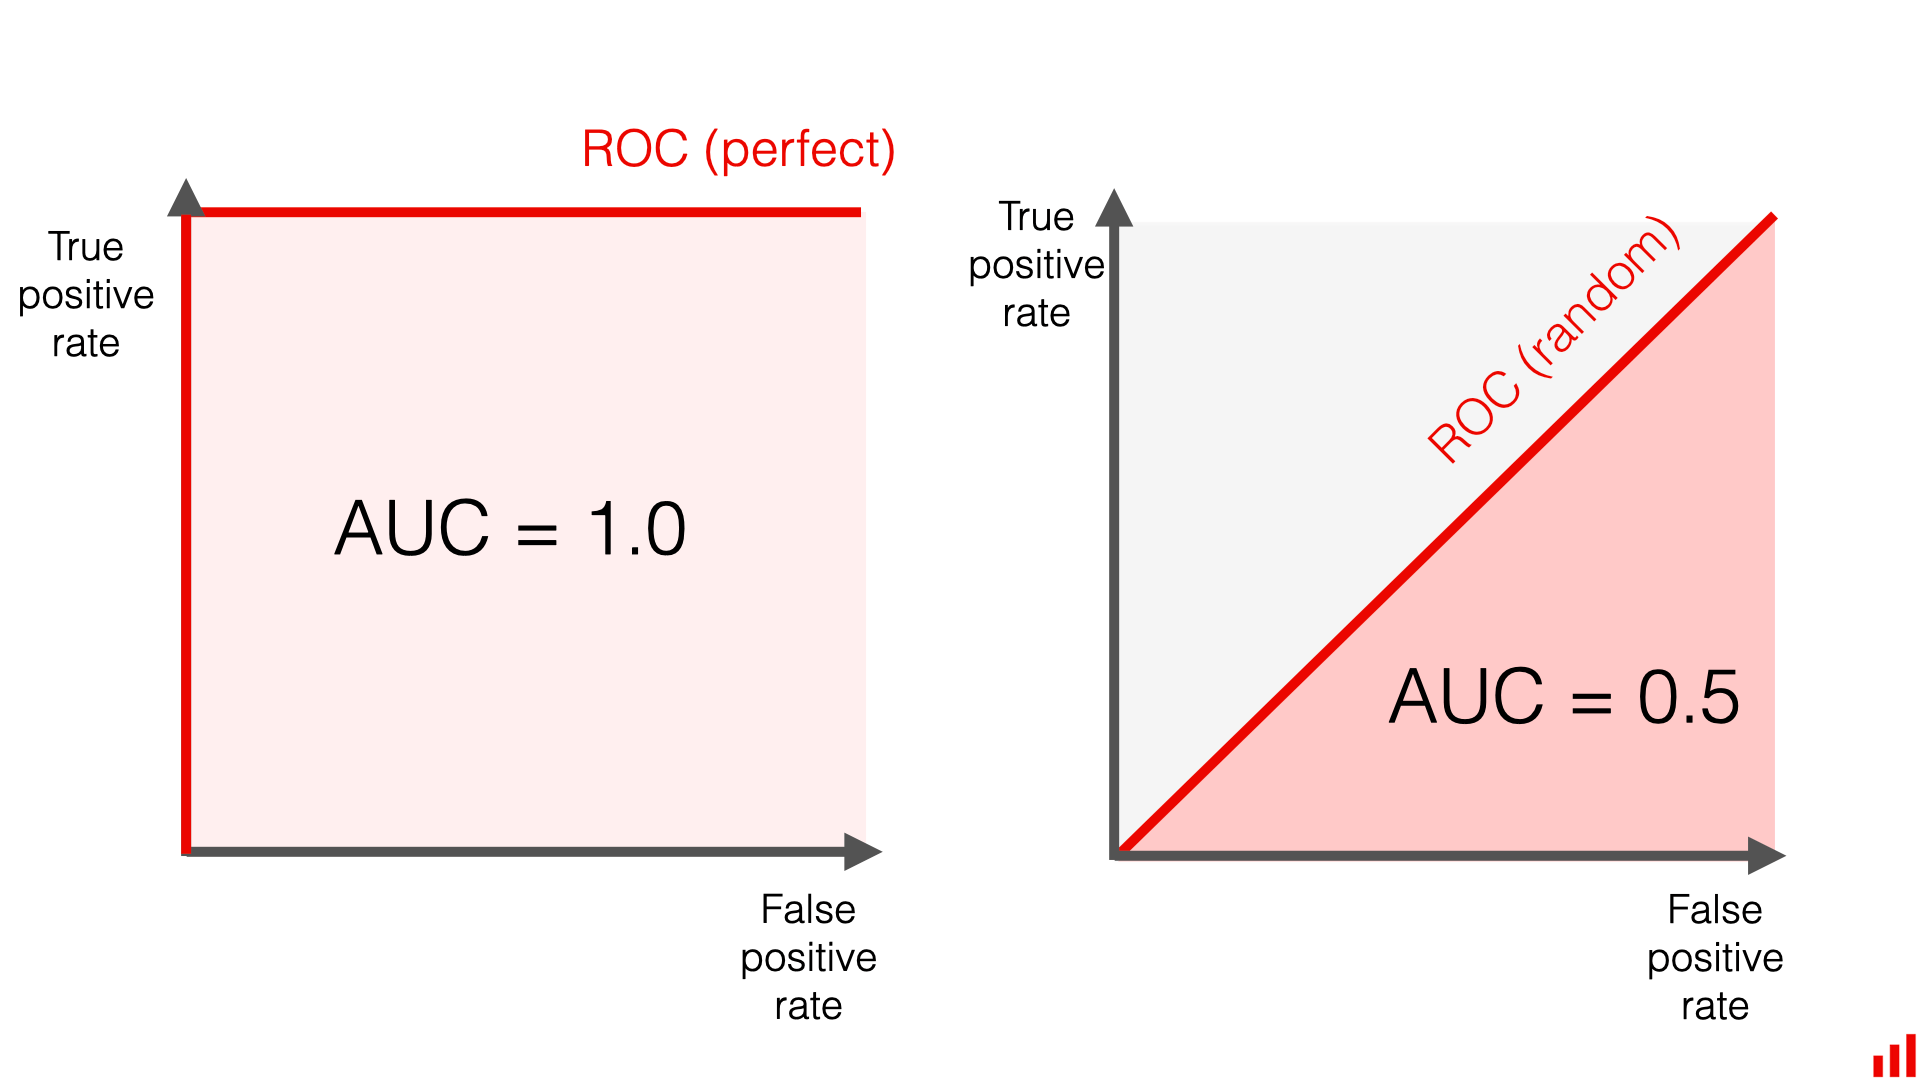

In [19]:
import pyspark.ml.evaluation as evals

evaluator = evals.BinaryClassificationEvaluator(metricName="areaUnderROC")

Обучите модель.

In [20]:
model = lr.fit(training)
print(model)

LogisticRegressionModel: uid=LogisticRegression_6ef2a8c7f7e0, numClasses=2, numFeatures=712


Протестируйте модель.

In [21]:
test_results = model.transform(test)
print(evaluator.evaluate(test_results))

0.6662328371786596


Точность классификатора – чуть меньше 0.7. Результат посредственный. Проведите несколько экспериментов с предобработкой и ответьте на следующие вопросы:
1. Повысится ли качество, если не использовать данные о пункте вылета?
2. Повысится ли качество, если не использовать данные о пункте прилета?
3. Повысится ли качество, если не использовать данные о перевозчике?
4. Повысится ли качество, если не использовать данные о месяце перелета?
5. Повысится ли качество, если задать направление полета иначе (см. задание 2)?

задание 1

In [23]:
vec_assembler_no_origin = VectorAssembler(inputCols=["MONTH", "DISTANCE", "carrier_fact", "dest_fact"], outputCol="features")
flights_pipe_no_origin = Pipeline(stages=[dest_indexer, dest_encoder, carr_indexer, carr_encoder, vec_assembler_no_origin])

piped_data_no_origin = flights_pipe_no_origin.fit(dfM).transform(dfM)
training_no_origin, test_no_origin = piped_data_no_origin.randomSplit([.7, .3])

model_no_origin = lr.fit(training_no_origin)
test_results_no_origin = model_no_origin.transform(test_no_origin)

roc_no_origin = evaluator.evaluate(test_results_no_origin)
print(f"ROC без данных о пункте вылета: {roc_no_origin}")

ROC без данных о пункте вылета: 0.6487377859731082


задание 2

In [24]:
vec_assembler_no_dest = VectorAssembler(inputCols=["MONTH", "DISTANCE", "carrier_fact", "origin_fact"], outputCol="features")
flights_pipe_no_dest = Pipeline(stages=[carr_indexer, carr_encoder, origin_indexer, origin_encoder, vec_assembler_no_dest])

piped_data_no_dest = flights_pipe_no_dest.fit(dfM).transform(dfM)
training_no_dest, test_no_dest = piped_data_no_dest.randomSplit([.7, .3])

model_no_dest = lr.fit(training_no_dest)
test_results_no_dest = model_no_dest.transform(test_no_dest)

roc_no_dest = evaluator.evaluate(test_results_no_dest)
print(f"ROC без данных о пункте прилета: {roc_no_dest}")

ROC без данных о пункте прилета: 0.6462219649750326


задание 3

In [25]:
vec_assembler_no_carrier = VectorAssembler(inputCols=["MONTH", "DISTANCE", "dest_fact", "origin_fact"], outputCol="features")
flights_pipe_no_carrier = Pipeline(stages=[dest_indexer, dest_encoder, origin_indexer, origin_encoder, vec_assembler_no_carrier])

piped_data_no_carrier = flights_pipe_no_carrier.fit(dfM).transform(dfM)
training_no_carrier, test_no_carrier = piped_data_no_carrier.randomSplit([.7, .3])

model_no_carrier = lr.fit(training_no_carrier)
test_results_no_carrier = model_no_carrier.transform(test_no_carrier)

roc_no_carrier = evaluator.evaluate(test_results_no_carrier)
print(f"ROC без данных о перевозчике: {roc_no_carrier}")

ROC без данных о перевозчике: 0.6566770116127446


задание 4

In [26]:
vec_assembler_no_month = VectorAssembler(inputCols=["DISTANCE", "carrier_fact", "dest_fact", "origin_fact"], outputCol="features")
flights_pipe_no_month = Pipeline(stages=[dest_indexer, dest_encoder, carr_indexer, carr_encoder, origin_indexer, origin_encoder, vec_assembler_no_month])

piped_data_no_month = flights_pipe_no_month.fit(dfM).transform(dfM)
training_no_month, test_no_month = piped_data_no_month.randomSplit([.7, .3])

model_no_month = lr.fit(training_no_month)
test_results_no_month = model_no_month.transform(test_no_month)

roc_no_month = evaluator.evaluate(test_results_no_month)
print(f"ROC без данных о месяце перелета: {roc_no_month}")

ROC без данных о месяце перелета: 0.6375005231517067


задание 5

In [27]:
from pyspark.sql.functions import concat

dfM = dfM.withColumn("ROUTE", concat(col("ORIGIN"), F.lit("-"), col("DEST")))

route_indexer = StringIndexer(inputCol="ROUTE", outputCol="route_index")
route_encoder = OneHotEncoder(inputCol="route_index", outputCol="route_fact")

vec_assembler_with_route = VectorAssembler(inputCols=["MONTH", "DISTANCE", "carrier_fact", "route_fact"], outputCol="features")
flights_pipe_with_route = Pipeline(stages=[carr_indexer, carr_encoder, route_indexer, route_encoder, vec_assembler_with_route])

piped_data_with_route = flights_pipe_with_route.fit(dfM).transform(dfM)
training_with_route, test_with_route = piped_data_with_route.randomSplit([.7, .3])

model_with_route = lr.fit(training_with_route)
test_results_with_route = model_with_route.transform(test_with_route)

roc_with_route = evaluator.evaluate(test_results_with_route)
print(f"ROC с направлением как пара ORIGIN-DEST: {roc_with_route}")

ROC с направлением как пара ORIGIN-DEST: 0.6654968223169132


Результат не изменился, в некотрых случаях даже уменьшился на одну сотую


## Куда сдавать?

По инструкции в гитхаб – https://shy-question-39d.notion.site/1150ea832e418032bfc3d3e827c380fb?pvs=74

- К этой работе тестов нет.
- Загружайте в формате .ipynb, а не ссылкой на колаб.
- Пул-реквест нужно сделать в ветку `lab1`.

**Устная защита работ не требуется, но вам могут быть заданы вопросы прямо в вашем пул-реквесте!**